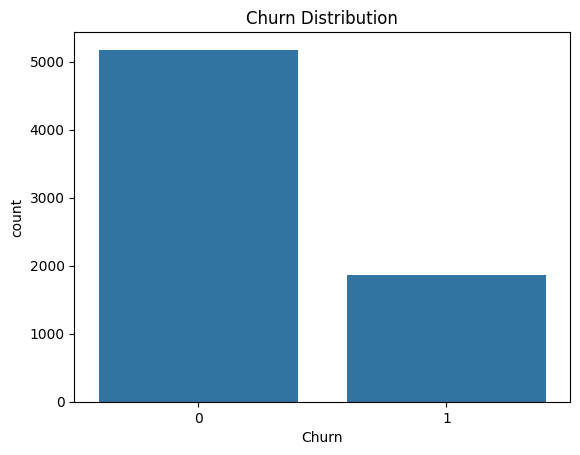

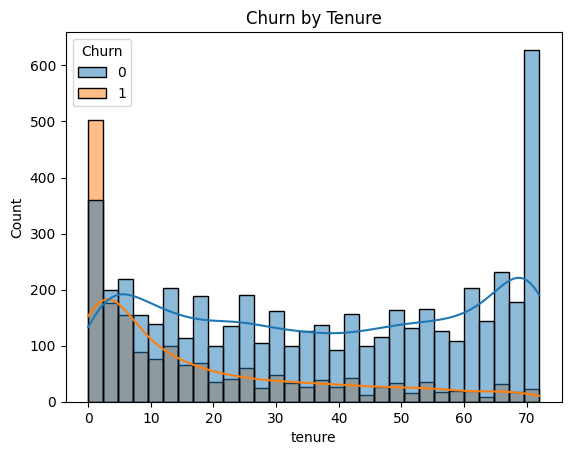

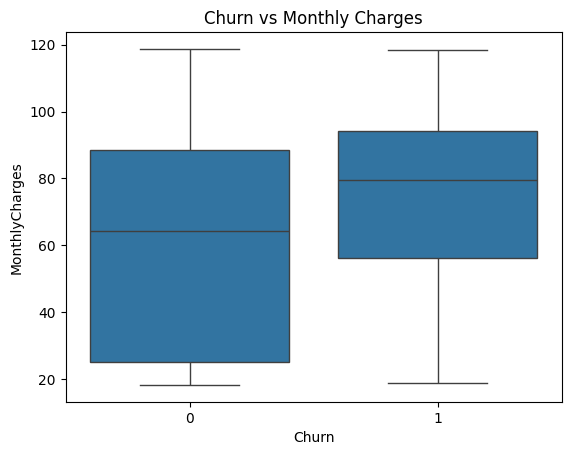

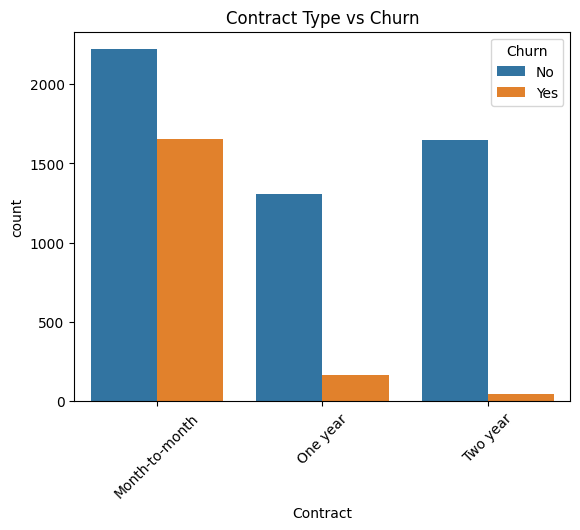

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



LOGISTIC REGRESSION RESULTS
Accuracy: 0.8034066713981547
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409


RANDOM FOREST RESULTS
Accuracy: 0.7899219304471257
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


XGBOOST RESULTS
Accuracy: 0.7892122072391767
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1035
           1       0.62      0.54      0.58       374

    accuracy              

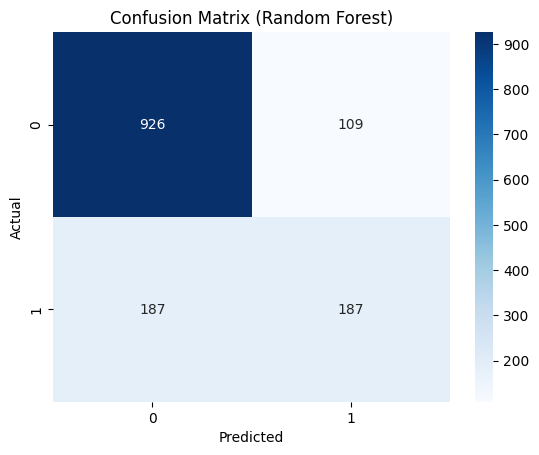

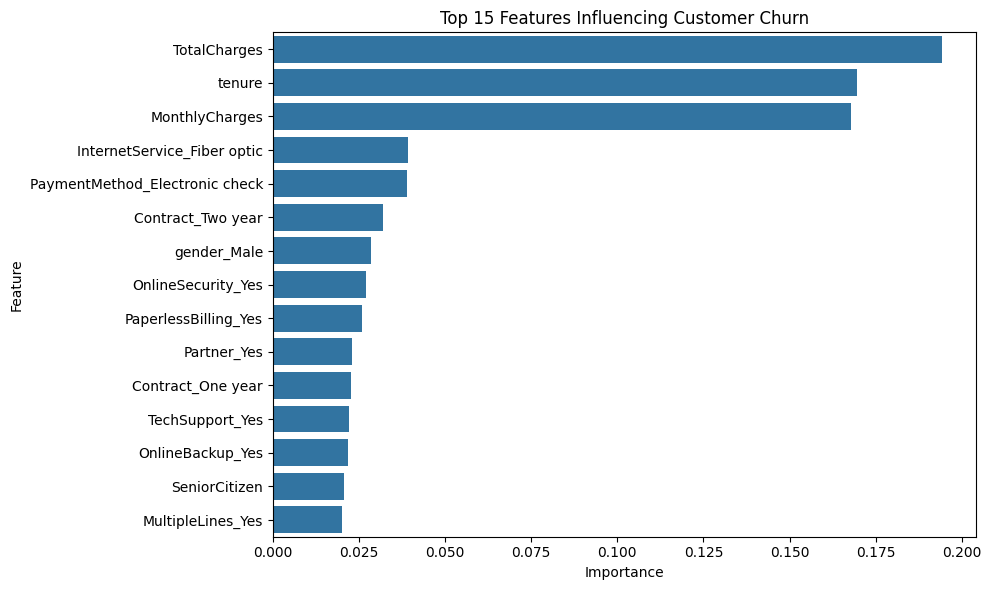


Models saved successfully!

--- BUSINESS INSIGHTS ---

1️⃣ Long-term customers churn far less — tenure is a key retention factor.
2️⃣ Month-to-month contracts show the highest churn risk.
3️⃣ Higher monthly charges significantly increase churn probability.
4️⃣ Fiber optic users churn more than DSL customers.
5️⃣ Lack of add-on services (Tech Support, Online Security) increases churn.
6️⃣ Electronic check payment is strongly associated with churn.


In [5]:
# ===============================
# IMPORTS
# ===============================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from xgboost import XGBClassifier
import joblib

# ===============================
# LOAD DATA
# ===============================
df_raw = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# ===============================
# DATA CLEANING (NO WARNINGS)
# ===============================
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df = df.drop(columns=['customerID'])

df = pd.get_dummies(df, drop_first=True)

# ===============================
# EXPLORATORY DATA ANALYSIS
# ===============================
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title("Churn by Tenure")
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df_raw)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()

# ===============================
# TRAIN-TEST SPLIT
# ===============================
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ===============================
# LOGISTIC REGRESSION
# ===============================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("\nLOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ===============================
# RANDOM FOREST
# ===============================
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("\nRANDOM FOREST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ===============================
# XGBOOST
# ===============================
xgb_model = XGBClassifier(
    learning_rate=0.1,
    n_estimators=250,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("\nXGBOOST RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# ===============================
# CONFUSION MATRIX (BEST MODEL)
# ===============================
cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ===============================
# FEATURE IMPORTANCE (RANDOM FOREST)
# ===============================
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title("Top 15 Features Influencing Customer Churn")
plt.tight_layout()
plt.show()

# ===============================
# SAVE MODELS
# ===============================
joblib.dump(log_model, "churn_logistic_model.pkl")
joblib.dump(rf_model, "churn_random_forest_model.pkl")
joblib.dump(xgb_model, "churn_xgboost_model.pkl")

print("\nModels saved successfully!")

# ===============================
# BUSINESS INSIGHTS
# ===============================
print("\n--- BUSINESS INSIGHTS ---\n")
print("1️⃣ Long-term customers churn far less — tenure is a key retention factor.")
print("2️⃣ Month-to-month contracts show the highest churn risk.")
print("3️⃣ Higher monthly charges significantly increase churn probability.")
print("4️⃣ Fiber optic users churn more than DSL customers.")
print("5️⃣ Lack of add-on services (Tech Support, Online Security) increases churn.")
print("6️⃣ Electronic check payment is strongly associated with churn.")
